# PUC MINAS

## Pós Graduação em Ciência de Dados e Big Data (2019-2020)

### Trabalho de Conclusão de Curso

### Aluna: Maria da Glória dos Santos Batista de Oliveira




__Leitura dos dados e importação das bibliotecas utilizadas__

Para iniciar o trabalho, primeiramente é necessário fazer download dos datasets informados previamente. Assim o documento poderá ser lido sem que qualquer problema ocorra.

No código a seguir, as importações das bibliotecas utilizadas e a definição dos métodos para facilitar a visualização dos dados e exibição de gráficos de value counts no Pandas.

In [1]:
# Imports das bibliotecas utilizadas

import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Manipulando o tamanho padrão do plot
plt.rcParams['figure.figsize'] = 8, 5

# Machine Learning
from fbprophet import Prophet

# Não exibir as mensagens de warnings
import warnings
warnings.filterwarnings('ignore')

Vamos realizar as importações dos datasets utilizados:

In [2]:
# Import do dataset utilizado

ativos = '../datasets_tratados/df_ativos.csv'

# filtrando as colunas que serão utilizadas:
lista_colunas = ["date", "count"]

df_ativos = pd.read_csv(ativos, sep=',', parse_dates=['date'], usecols=lista_colunas)

In [3]:
# Import do dataset utilizado

recuperados = '../datasets_tratados/df_recuperados.csv'

# filtrando as colunas que serão utilizadas:
lista_colunas = ["date", "count"]

df_recuperados = pd.read_csv(recuperados, sep=',', parse_dates=['date'], usecols=lista_colunas)

In [4]:
# Import do dataset utilizado

mortos = '../datasets_tratados/df_mortos.csv'

# filtrando as colunas que serão utilizadas:
lista_colunas = ["date", "count"]

df_mortos = pd.read_csv(mortos, sep=',', parse_dates=['date'], usecols=lista_colunas)

#### Visualizando os datasets:

In [5]:
# Visualizando o dataset

df_ativos.head(5)

,date,count
0,2020-02-25,0
1,2020-02-26,1
2,2020-02-27,1
3,2020-02-28,1
4,2020-02-29,2


In [6]:
# Visualizando o dataset

df_recuperados.head(5)

,date,count
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0


In [7]:
# Visualizando o dataset

df_mortos.head(5)

,date,count
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0


### -  Previsão sobre o Corona Vírus para os seguintes cenários:

#### - Quantidade de pessoas que terão essa doença

In [8]:
# Os dados a serem recebidos no Prophet serão sempre duas colunas: ds e y.
# O ds será sempre do tipo data (formato esperado no Pandas),
# o ideal é que seja YYYY-MM-DD para data ou YYYY-MM-DD HH:MM:SS para timestamp. 
# A coluna y deve ser numérica e representa a medida que devemos prever.

df_ativos.columns = ['ds','y']

df_ativos['ds'] = pd.to_datetime(df_ativos['ds'])

In [9]:
# Visualizando os tipos de dados

df_ativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      172 non-null    datetime64[ns]
 1   y       172 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [10]:
# Gerando uma previsão semanal de casos ativos relacionados a COVID-19 usando Prophet 
# com 95% de intervalo de predição criando um modelo base com parâmetros relacionados 
# com a facilidade e regressores adicionais.

m = Prophet(interval_width=0.95)
m.fit(df_ativos)
futuro = m.make_future_dataframe(periods=7)
futuro.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
174,2020-08-17
175,2020-08-18
176,2020-08-19
177,2020-08-20
178,2020-08-21


In [11]:
# Prevendo o futuro com data, e limite superior e inferior do valor referente a y

previsao = m.predict(futuro)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
174,2020-08-17,868190.439021,749379.286204,985635.363427
175,2020-08-18,835781.891333,718224.105721,946713.995658
176,2020-08-19,839894.497779,723035.887852,956438.876782
177,2020-08-20,847354.035930,721655.212636,962140.571528
178,2020-08-21,861003.578123,745631.868336,973143.512709


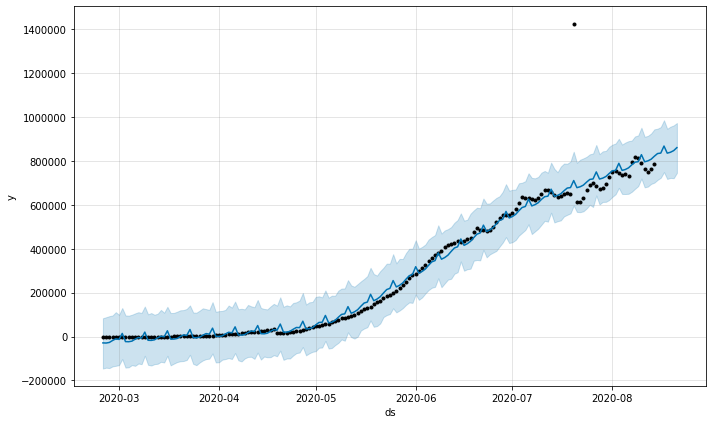

In [12]:
# Visualizando um gráfico sobre a previsão de casos ativos por data e quantidade

previsao_ativos_plot = m.plot(previsao)

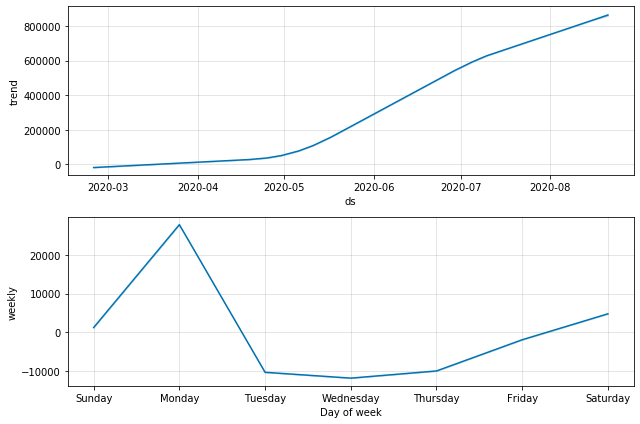

In [13]:
# Visualizando dois gráficos (tendência mensal e semanal de casos ativos)

previsao_ativos_plot = m.plot_components(previsao)

####  - Quantidade de pessoas que se recuperarão desta doença


In [14]:
# Os dados a serem recebidos no Prophet serão sempre duas colunas: ds e y.
# O ds será sempre do tipo data (formato esperado no Pandas),
# o ideal é que seja YYYY-MM-DD para data ou YYYY-MM-DD HH:MM:SS para timestamp. 
# A coluna y deve ser numerica e representa a medida que devemos prever.

df_recuperados.columns = ['ds','y']
df_recuperados['ds'] = pd.to_datetime(df_recuperados['ds'])

In [15]:
# Visualizando os tipos de dados

df_recuperados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      172 non-null    datetime64[ns]
 1   y       172 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [16]:
# Prevendo o futuro com data, e limite superior e inferior do valor referente a y

m = Prophet(interval_width=0.95)
m.fit(df_recuperados)
futuro_recuperados = m.make_future_dataframe(periods=7)
futuro_recuperados.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
174,2020-08-17
175,2020-08-18
176,2020-08-19
177,2020-08-20
178,2020-08-21


In [17]:
# Prevendo o futuro com data, e limite superior e inferior do valor referente a y

previsao_recuperados = m.predict(futuro_recuperados)
previsao_recuperados[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
174,2020-08-17,2.389830e+06,2.265490e+06,2.511919e+06
175,2020-08-18,2.466820e+06,2.352255e+06,2.589842e+06
176,2020-08-19,2.509074e+06,2.381931e+06,2.626886e+06
177,2020-08-20,2.547014e+06,2.424616e+06,2.669642e+06
178,2020-08-21,2.578650e+06,2.447614e+06,2.695530e+06


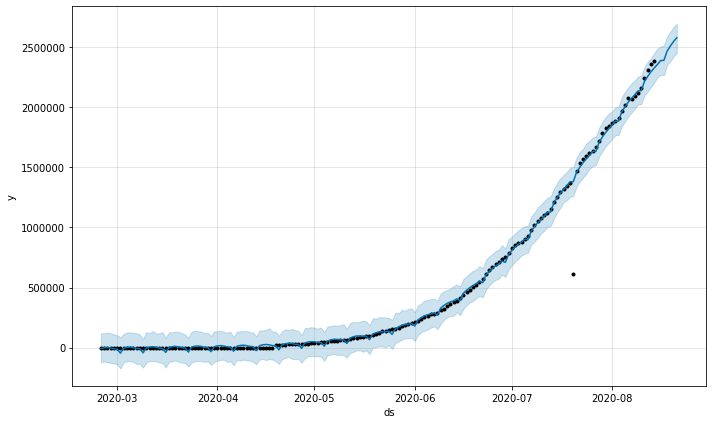

In [18]:
# Visualizando um gráfico sobre a previsão de casos ativos por data e quantidade

previsao_recuperados_plot = m.plot(previsao_recuperados)

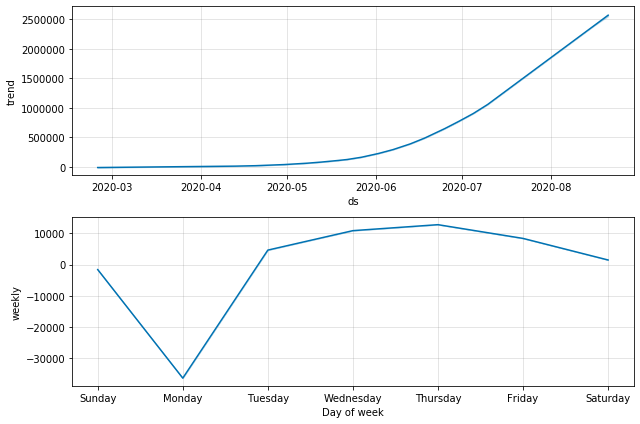

In [19]:
# Visualizando dois gráficos (tendência mensal e semanal de casos ativos)

previsao_recuperados_plot = m.plot_components(previsao_recuperados)

#### - Quantidade de pessoas que morrerão com esta doença

In [20]:
# Os dados a serem recebidos no Prophet serão sempre duas colunas: ds e y.
# O ds será sempre do tipo data (formato esperado no Pandas),
# o ideal é que seja YYYY-MM-DD para data ou YYYY-MM-DD HH:MM:SS para timestamp. 
# A coluna y deve ser numerica e representa a medida que devemos prever.

df_mortos.columns = ['ds','y']
df_mortos['ds'] = pd.to_datetime(df_mortos['ds'])

In [21]:
# Visualizando os tipos de dados

df_mortos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      172 non-null    datetime64[ns]
 1   y       172 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [22]:
# Prevendo o futuro com data, e limite superior e inferior do valor referente a y

m = Prophet(interval_width=0.95)
m.fit(df_mortos)
futuro_mortos = m.make_future_dataframe(periods=7)
futuro_mortos.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
174,2020-08-17
175,2020-08-18
176,2020-08-19
177,2020-08-20
178,2020-08-21


In [23]:
# Prevendo o futuro com data, e limite superior e inferior do valor referente a y

previsao_mortos = m.predict(futuro_mortos)
previsao_mortos[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
174,2020-08-17,109335.908509,109013.297086,109654.806569
175,2020-08-18,110510.201498,110129.623919,110847.660642
176,2020-08-19,111669.029969,111272.631605,112083.662902
177,2020-08-20,112838.846520,112307.215013,113351.528620
178,2020-08-21,113935.624797,113314.623087,114515.431946


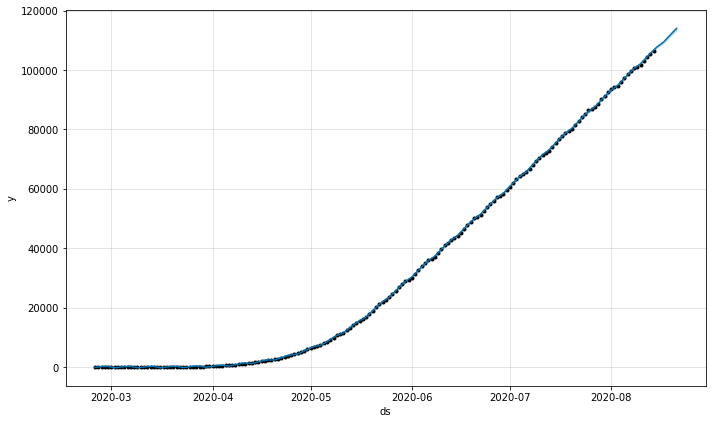

In [24]:
# Visualizando um gráfico sobre a previsão de casos ativos por data e quantidade

previsao_mortos_plot = m.plot(previsao_mortos)

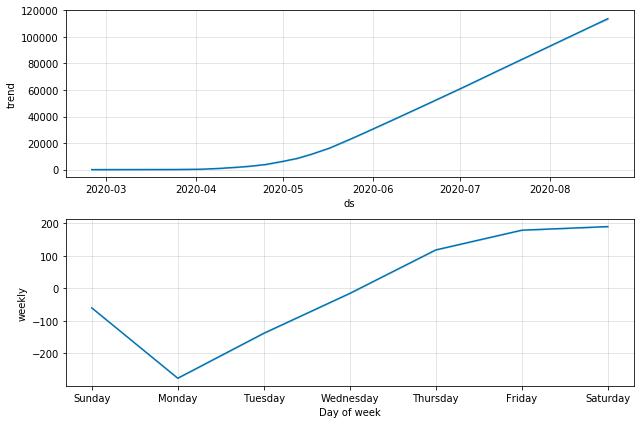

In [25]:
# Visualizando dois gráficos (tendência mensal e semanal de casos ativos)

previsao_mortos_plot = m.plot_components(previsao_mortos)

#### - Conclusão baseada nas previsões

Conforme observado nas predições de séries temporais utilizando o Prophet, pode-se notar que se nenhuma medida a mais de precaução for tomada, a quantidade de casos de pessoas contamindas pelo Corona Vírus irá aumentar, logo infelizmente também irá aumentar a quantidade de pessoas que morrerão com essa doença.